In [48]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as ks
import pickle


In [49]:
dataset = pd.read_csv('sensor.csv')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [50]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())
dataset = dataset.dropna(how='all')

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious


In [51]:
counts = dataset['Is_Malicious'].value_counts()
counts_filtered = counts.loc[[0, 1]]
print(counts_filtered)

Is_Malicious
0    9513
1     487
Name: count, dtype: int64


In [52]:
dataset.shape

(10000, 21)

In [53]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'dataset' is your DataFrame containing the whole dataset
enc = LabelEncoder()

# Convert 'Timestamp' and 'IP_Address' columns to numeric representation
dataset[[ 'IP_Address']] = \
    dataset[['IP_Address']].apply(enc.fit_transform)

# Convert 'Timestamp' column to UNIX timestamp (seconds)
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp']).astype('int64') // 10**9

# Display the modified DataFrame
print(dataset.head())


   Node_ID   Timestamp  IP_Address  Packet_Rate  Packet_Drop_Rate  \
0        1  1672617600         861    52.018229          2.727317   
1        2  1672617660        5081    59.504648          1.435058   
2        3  1672617720        3510    34.118204          1.320905   
3        4  1672617780        8345    39.643055          1.988791   
4        5  1672617840        5429    40.212679          1.005121   

   Packet_Duplication_Rate  Data_Throughput  Signal_Strength        SNR  \
0                 0.955687       130.967180       -52.059232  23.974265   
1                 1.228460        82.634358       -57.754723  22.572052   
2                 1.015245        61.649928       -52.399037  15.667076   
3                 0.784562        69.704181       -53.727443  20.286962   
4                 1.412193       123.445612       -49.696620  24.318538   

   Battery_Level  ...  Number_of_Neighbors  Route_Request_Frequency  \
0      82.982598  ...                    3                11.32

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming dataset is a pandas DataFrame
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Convert the scaled NumPy array back to a DataFrame with original column names
dataset_scaled_df = pd.DataFrame(dataset_scaled, columns=dataset.columns)
dataset_scaled_df.head()



,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,0.0000,0.000000,0.093202,0.370660,0.421887,0.483303,0.726891,0.387964,0.654562,0.588587,...,0.357143,0.438084,0.364206,0.538487,0.360808,0.258052,0.296612,0.399257,0.362036,0.0
1,0.0001,0.000004,0.550011,0.446889,0.240218,0.660597,0.432764,0.261806,0.621356,0.403047,...,0.571429,0.290589,0.252353,0.376536,0.358555,0.157552,0.390018,0.505119,0.606860,0.0
2,0.0002,0.000008,0.379952,0.188397,0.224170,0.522014,0.305064,0.380438,0.457839,0.492789,...,0.500000,0.286667,0.230932,0.500502,0.275840,0.081752,0.541996,0.451933,0.641372,0.0
3,0.0003,0.000011,0.903334,0.244653,0.318063,0.372078,0.354078,0.351013,0.567243,0.516964,...,0.571429,0.407125,0.154018,0.397869,0.180935,0.191066,0.521447,0.574054,0.679332,0.0
4,0.0004,0.000015,0.587681,0.250453,0.179776,0.780017,0.681119,0.440298,0.662715,0.605663,...,0.642857,0.431003,0.328383,0.272133,0.222654,0.131454,0.372950,0.344322,0.326941,0.0


In [55]:
#Data Processisng
from sklearn.model_selection import train_test_split
x = dataset.drop(['Is_Malicious'],axis=1)
y = dataset['Is_Malicious']

In [56]:
import numpy as np

# Assuming 'dataset' is your NumPy array containing features and the target variable
dataset = dataset.astype(np.float32)
X_train = dataset.drop(['Is_Malicious'],axis=1)
y_train = dataset['Is_Malicious']

# Print the shapes of X_train and y_train to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (10000, 20)
Shape of y_train: (10000,)


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the original dataset into training and testing datasets
smote = SMOTE()
smote.fit_resample(X_train.astype('float'), y_train)
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5)

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the training dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)


In [58]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 6660, 1: 340})
After SMOTE : Counter({0: 6660, 1: 6660})


array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'IP_Address'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Battery_Level'}>],
       [<Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>,
        <Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>],
       [<Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>,
        <Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Me

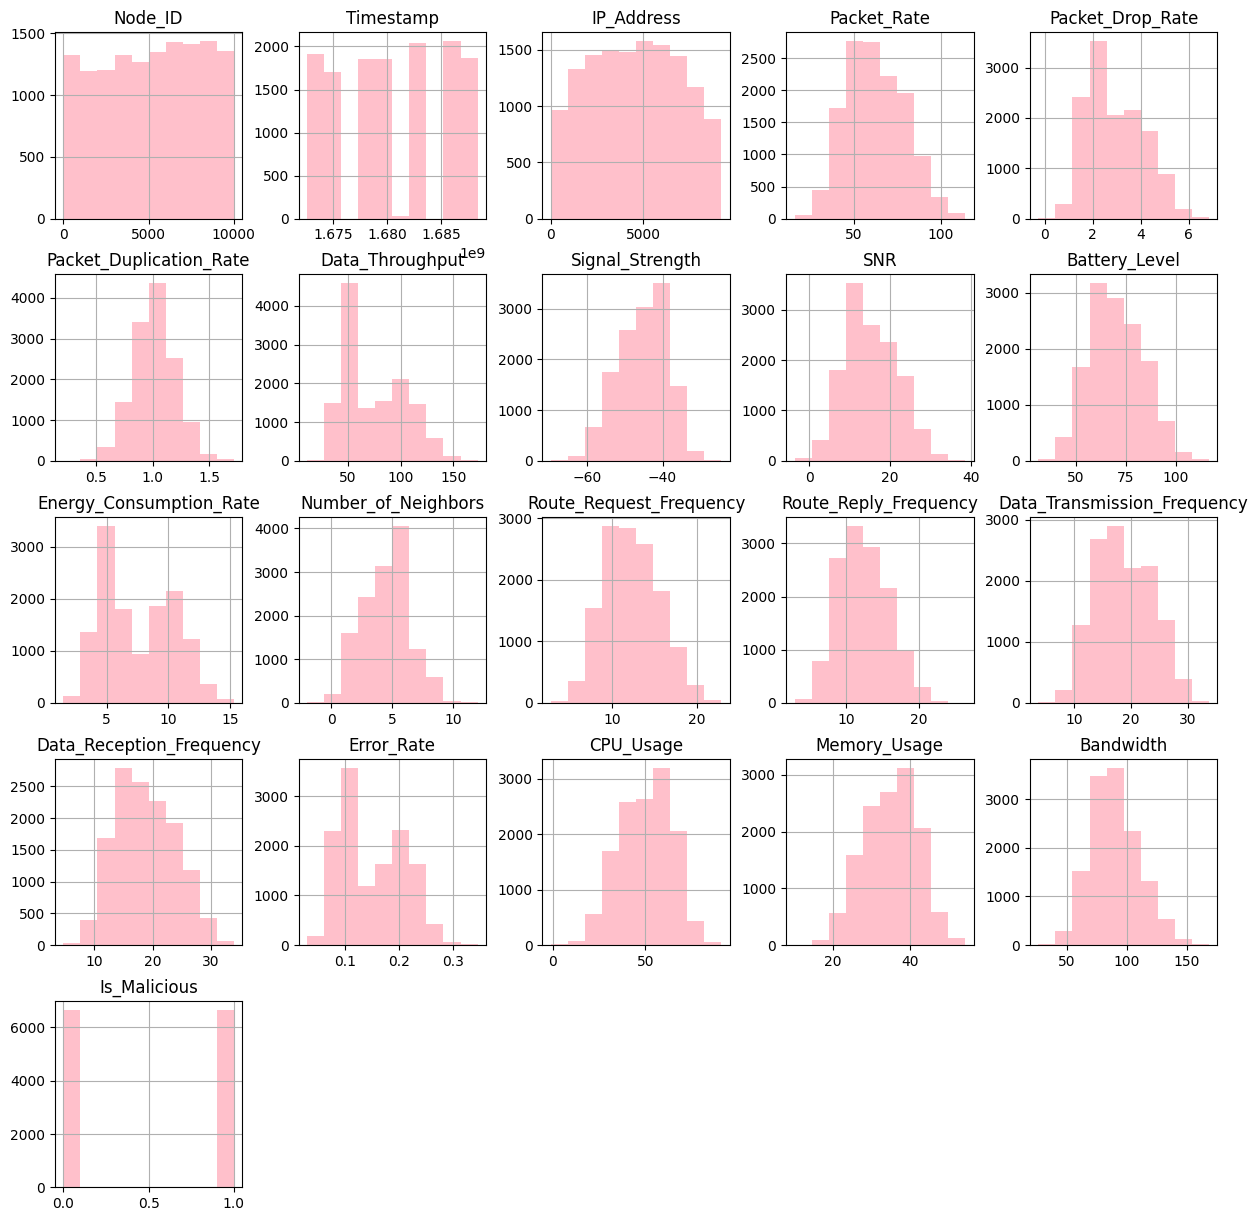

In [59]:
train_data = X_train_smote.join(y_train_smote)
train_data.hist(figsize=(15,15),color='pink')

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'IP_Address'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Battery_Level'}>],
       [<Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>,
        <Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>],
       [<Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>,
        <Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Me

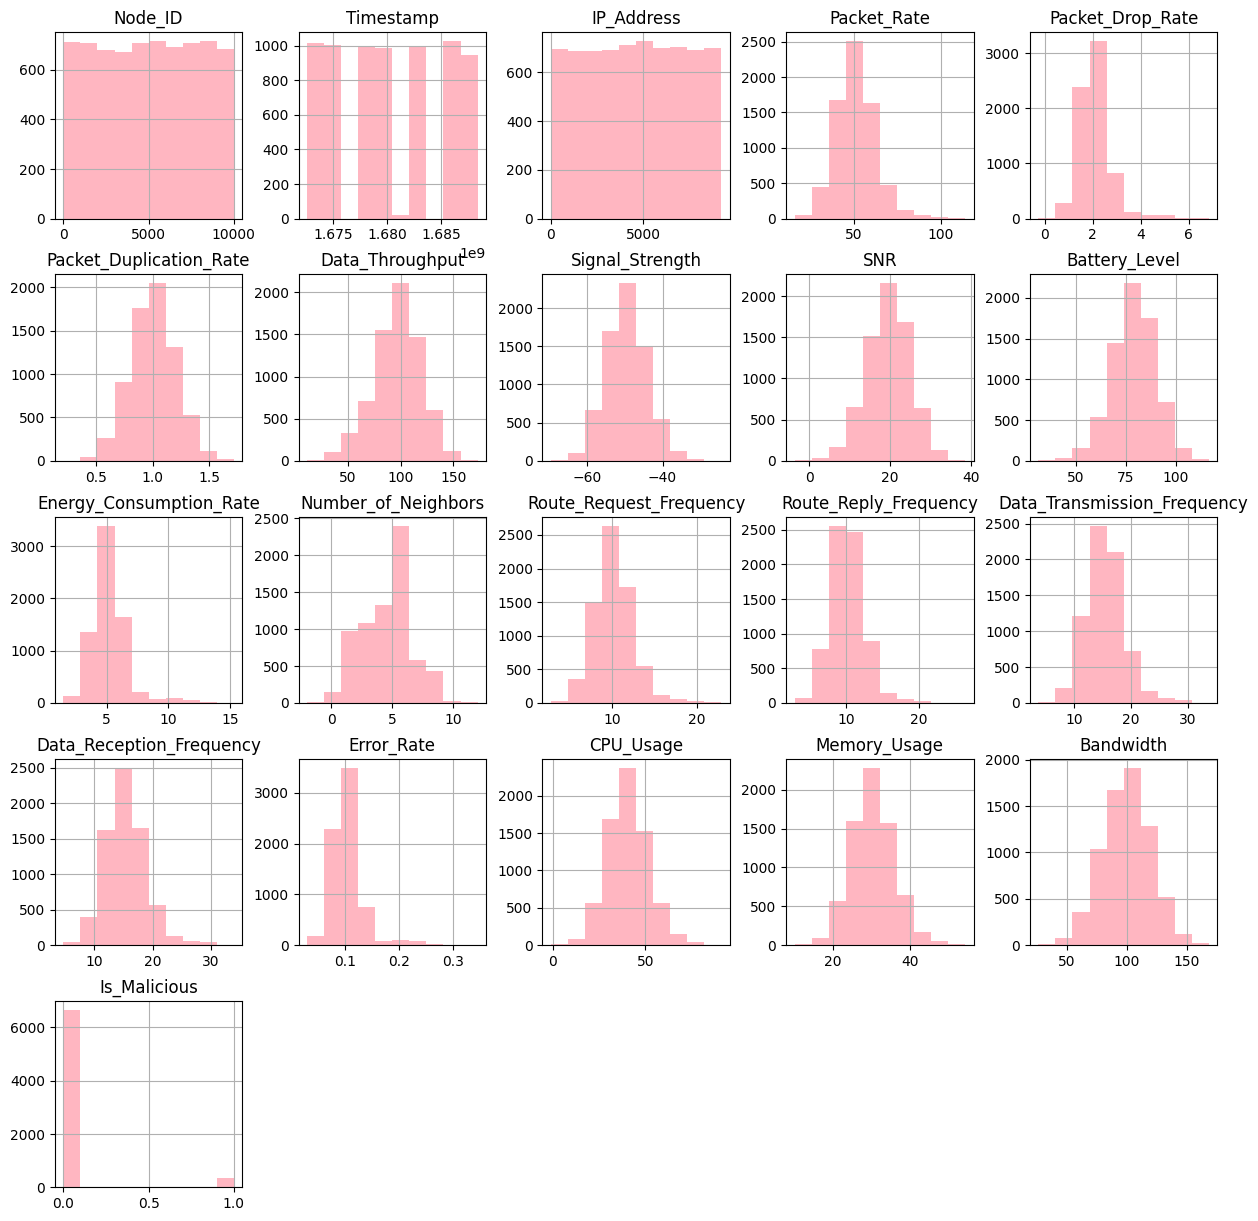

In [60]:
old_train_data = X_train.join(y_train)
old_train_data.hist(figsize=(15,15), color='lightpink')

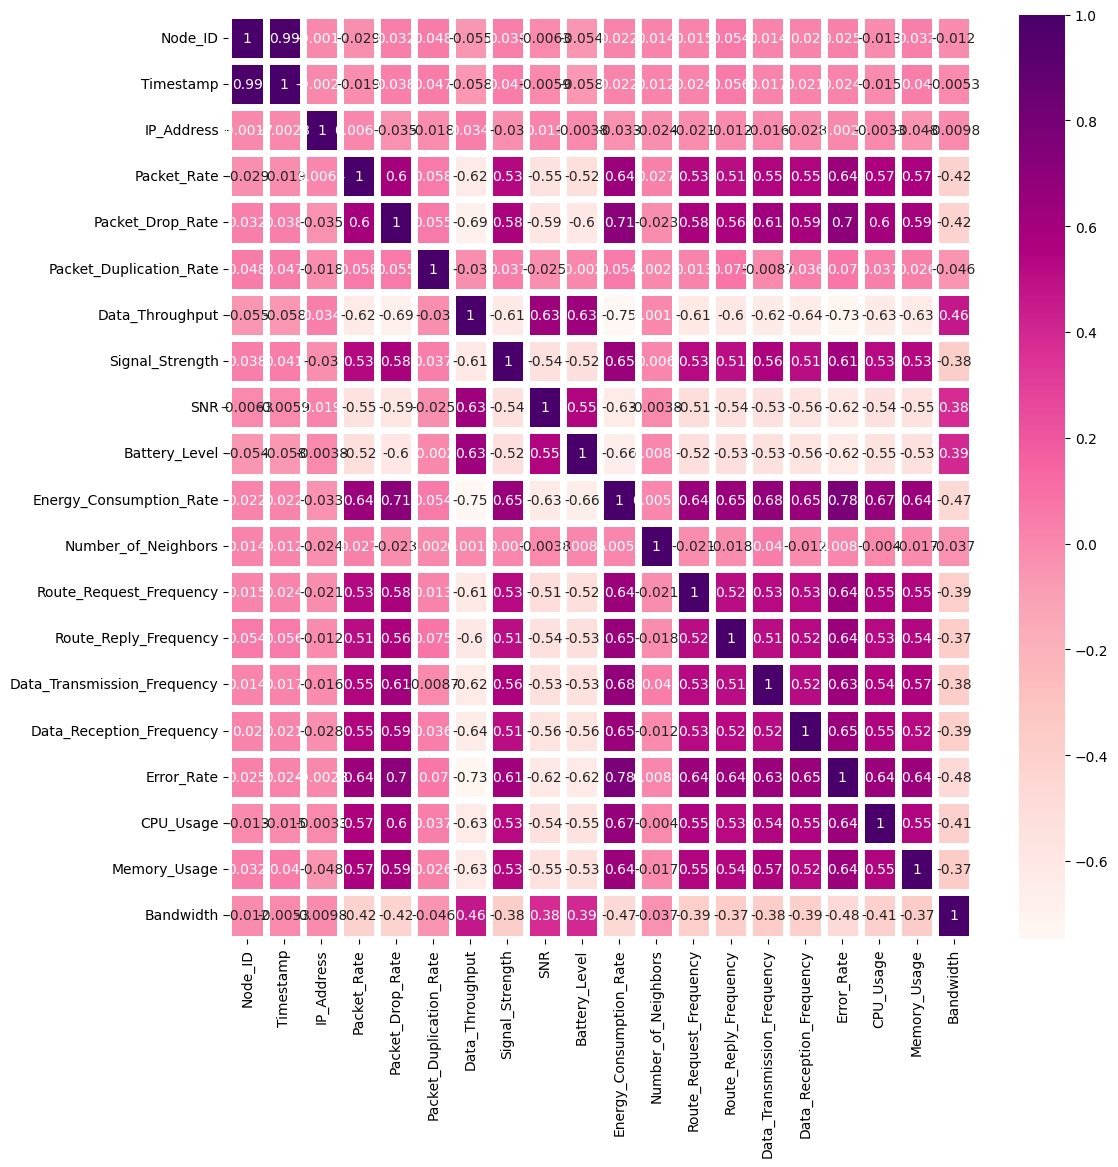

In [61]:
import seaborn as sns
#Using Pearson Correlation
X_train_smote = pd.DataFrame(X_train_smote)
plt.figure(figsize=(12,12))
cor = X_train_smote.corr()
sns.heatmap(cor, annot=True, cmap='RdPu',linewidths=5)
plt.show()

In [62]:
from scipy.stats import pearsonr
# Select two columns from the dataset to calculate correlation
output_column = 'Is_Malicious'
correlation_results = {}
for column in dataset.columns:
    if column != output_column:
        # Check for NaN values and handle them
        mask = ~np.isnan(dataset[column]) & ~np.isnan(dataset[output_column])
        correlation_coefficient, _ = pearsonr(dataset[column][mask], dataset[output_column][mask])
        correlation_results[column] = correlation_coefficient

# Sort the results by correlation coefficient in descending order
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Print the results
for column, correlation_coefficient in sorted_correlation_results:
    print(f"Correlation between {column} and {output_column}: {correlation_coefficient}")

Correlation between Error_Rate and Is_Malicious: 0.7105457053222168
Correlation between Energy_Consumption_Rate and Is_Malicious: 0.7025543943710643
Correlation between Packet_Drop_Rate and Is_Malicious: 0.6036342950428051
Correlation between Packet_Rate and Is_Malicious: 0.4670940477936761
Correlation between Data_Transmission_Frequency and Is_Malicious: 0.463770391719676
Correlation between Data_Reception_Frequency and Is_Malicious: 0.45976023317244713
Correlation between Route_Reply_Frequency and Is_Malicious: 0.4568821130725686
Correlation between Route_Request_Frequency and Is_Malicious: 0.4557357201276421
Correlation between Memory_Usage and Is_Malicious: 0.40269461573606885
Correlation between CPU_Usage and Is_Malicious: 0.40156877396142704
Correlation between Signal_Strength and Is_Malicious: 0.38386363889541014
Correlation between Timestamp and Is_Malicious: 0.010610746874914053
Correlation between Packet_Duplication_Rate and Is_Malicious: 0.010230353134723915
Correlation betw

In [63]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [64]:
corr_features = correlation(X_train_smote, 0.65)
len(set(corr_features))

6

In [65]:
corr_features

{'CPU_Usage',
 'Data_Throughput',
 'Data_Transmission_Frequency',
 'Energy_Consumption_Rate',
 'Error_Rate',
 'Timestamp'}

In [66]:
import pandas as pd

X_train_smote = X_train_smote.drop(corr_features, axis=1)
X_train_smote = X_train_smote.to_numpy()

In [67]:
X_train_smote.shape

(13320, 14)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train_smote, y_train_smote)
linear_train_preds = linear_model.predict(X_train_smote)
linear_val_preds = linear_model.predict(X_val)
mean_absolute_error(linear_train_preds, y_train_smote)
#The closer MAE is to 0, the more accurate the model is

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 20 features, but LinearRegression is expecting 14 features as input.

In [71]:
linear_model.score(X_val,y_val)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 20 features, but LinearRegression is expecting 14 features as input.

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = linear_model.predict(X_test)
y_pred = np.round(y_pred)
# Assuming y_true contains the true target values and y_pred contains the predicted values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate precision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (3710984.py, line 18)

In [74]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=110,max_depth=3,random_state=1,criterion='entropy',min_samples_split=2,min_weight_fraction_leaf=1,max_features='auto',bootstrap=True)

forest.fit(X_train_smote,y_train_smote)

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'entropy' instead.

In [75]:
forest.score(X_val,y_val)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Accuracy: 0.9912095639943741
Precision: 0.9913167161561166
Recall: 0.9912095639943741
F1 Score: 0.9912090846876721
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1422
           1       1.00      0.98      0.99      1422

    accuracy                           0.99      2844
   macro avg       0.99      0.99      0.99      2844
weighted avg       0.99      0.99      0.99      2844



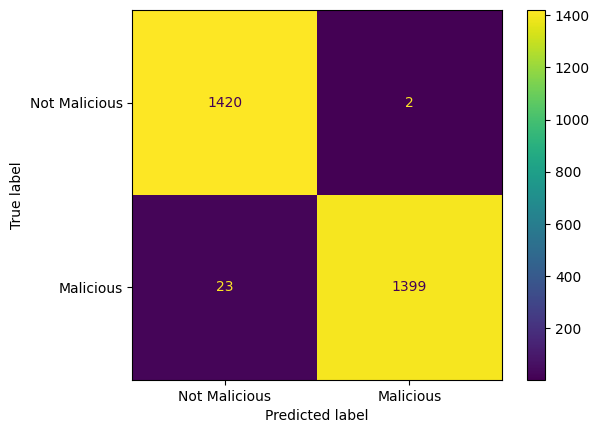

In [ ]:
y_pred = forest.predict(X_test)
y_pred_labels = np.round(y_pred)
# Convert predicted probabilities to class labels
#y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
# Calculate accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)


In [76]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
   "n_estimators": np.arange(100, 301, 50),
   "min_samples_split": [2, 4],
   "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train_smote,y_train_smote)

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'entropy' instead.


In [77]:
best_forest = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [78]:
best_forest.score(X_val,y_val)

NameError: name 'best_forest' is not defined

Accuracy: 0.9961322081575246
Precision: 0.9961520828604111
Recall: 0.9961322081575246
F1 Score: 0.9961321694234417
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1422
           1       1.00      0.99      1.00      1422

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



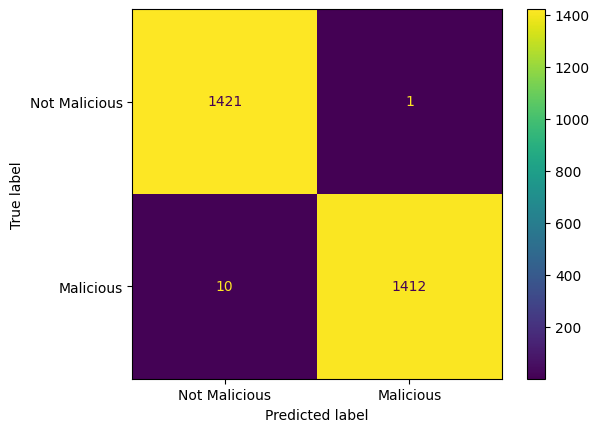

In [ ]:
y_pred = best_forest.predict(X_test)
y_pred_labels = np.round(y_pred)
# Convert predicted probabilities to class labels
#y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
# Calculate accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)

In [79]:
#ANN
import keras 
from keras import layers

model = keras.Sequential([
    keras.layers.Dense(16, kernel_initializer='uniform',input_shape=(12,), activation='relu',),  # Note the comma after 12 to make it a tuple
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
]) 

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 
x = np.column_stack((X_train_smote, y_train_smote))
y = y_train_smote.values
 
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=8)
x = np.column_stack((X_test, y_test))
y = y_test
model.evaluate(x=X_val, y=y_val, batch_size=8)

Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (8, 14)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(8, 14), dtype=float32)
  • training=True
  • mask=None

In [80]:
y_pred = model.predict(X_test_smote)
y_pred = np.round(y_pred)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)

NameError: name 'X_test_smote' is not defined

In [ ]:
import keras
from keras import layers
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier

import numpy as np
import keras
from keras import layers
from sklearn.model_selection import KFold

# Define your Keras model function
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(16, input_shape=(12,), activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Create an instance of your Keras model
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=0)

# Define the number of splits for k-fold cross-validation
k_folds = 5
kfold = KFold(n_splits=k_folds)

# Lists to store the evaluation scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X_train_smote):
    # Split the data into train and test sets for this fold
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]
    
    # Train the model on the train fold
    model.fit(X_train_fold, y_train_fold)
    
    # Evaluate the model on the validation fold
    evaluation = model.model.evaluate(x=X_val_fold, y=y_val_fold, batch_size=8)
    accuracy_scores.append(evaluation[1])  # Append accuracy to the list of scores

# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Print the average accuracy across all folds
print("Average Accuracy:", np.mean(accuracy_scores))




C:\Users\Dell\AppData\Local\Temp\ipykernel_18984\1591571456.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=0)


334/334 [==============================] - 1s 1ms/step - loss: 0.1391 - accuracy: 0.9906
Accuracy Scores for Each Fold: [0.9658664464950562, 0.9279549717903137, 0.9744840264320374, 0.9729831218719482, 0.9906191229820251]
Average Accuracy: 0.9663815379142762


C:\Users\Dell\AppData\Local\Temp\ipykernel_18984\688611342.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=0)


84/84 [==============================] - 0s 939us/step
Accuracy: 0.8805342938616239
Precision: 0.900339780960536
Recall: 0.8805342938616239
F1 Score: 0.8790382481716665
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      6663
           1       0.99      0.77      0.87      6663

    accuracy                           0.88     13326
   macro avg       0.90      0.88      0.88     13326
weighted avg       0.90      0.88      0.88     13326



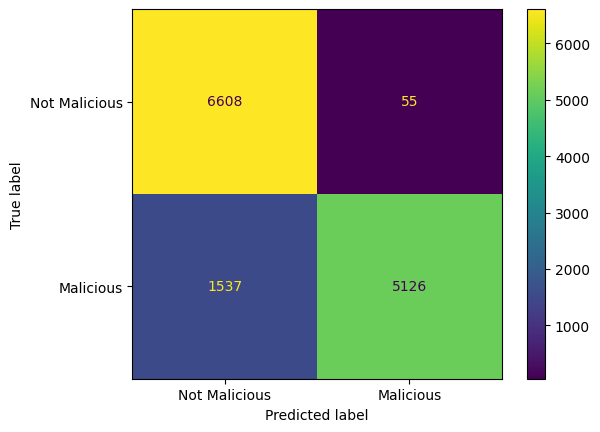

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import keras
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# Define your Keras model function
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(16, input_shape=(12,), activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Create an instance of your Keras model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=0)

# Define the number of splits for k-fold cross-validation
k_folds = 5
kfold = KFold(n_splits=k_folds)

# Lists to store the evaluation scores for each fold
accuracy_scores = []

# Lists to store true and predicted labels across all folds
true_labels = []
pred_labels = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X_train_smote):
    # Split the data into train and test sets for this fold
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]
    
    # Train the model on the train fold
    model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for the test fold
    y_pred_proba = model.predict_proba(X_val_fold)
    
    # Convert predicted probabilities to class labels
    y_pred_labels = np.argmax(y_pred_proba, axis=1)
    
    # Append true and predicted labels to the lists
    true_labels.extend(y_val_fold)
    pred_labels.extend(y_pred_labels)

# Compute confusion matrix over all folds
cm = confusion_matrix(true_labels, pred_labels, labels=[0, 1])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, pred_labels, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, pred_labels, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, pred_labels, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(true_labels, pred_labels)
print("Classification Report:\n", class_report)




In [ ]:
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier(max_depth=3,random_state=0,min_samples_split=15,min_samples_leaf=35,max_leaf_nodes=6,max_features="log2")
clf_DT = clf_DT.fit(X_train_smote,y_train_smote)

[Text(0.6328488372093023, 0.9615384615384616, 'x[3] <= 2.872\ngini = 0.5\nsamples = 13326\nvalue = [6663, 6663]'),
 Text(0.4052325581395349, 0.8846153846153846, 'x[2] <= 73.044\ngini = 0.172\nsamples = 7058\nvalue = [6388, 670]'),
 Text(0.2709302325581395, 0.8076923076923077, 'x[9] <= 62.138\ngini = 0.071\nsamples = 6569\nvalue = [6328.0, 241.0]'),
 Text(0.2069767441860465, 0.7307692307692307, 'x[5] <= -40.686\ngini = 0.031\nsamples = 6352\nvalue = [6251.0, 101.0]'),
 Text(0.13488372093023257, 0.6538461538461539, 'x[10] <= 44.668\ngini = 0.004\nsamples = 6076\nvalue = [6065, 11]'),
 Text(0.08372093023255814, 0.5769230769230769, 'x[7] <= 51.387\ngini = 0.003\nsamples = 6068\nvalue = [6060.0, 8.0]'),
 Text(0.037209302325581395, 0.5, 'x[11] <= 84.193\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.018604651162790697, 0.4230769230769231, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05581395348837209, 0.4230769230769231, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.13023

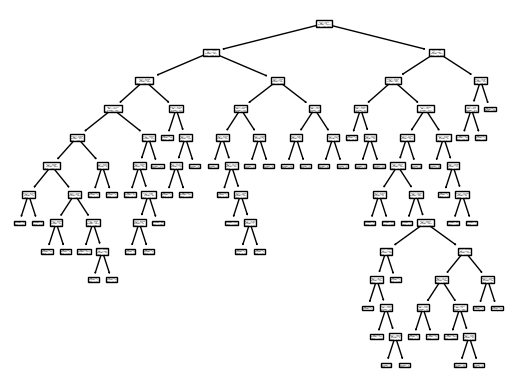

In [ ]:
tree.plot_tree(clf_DT)

In [ ]:
from sklearn import svm
h1=svm.LinearSVC(C=1,random_state=0,penalty='l1',loss='hinge')
h1.fit(X_train_smote,y_train_smote)
h1.score(X_train_smote,y_train_smote)

NameError: name 'X_train_smote' is not defined

In [ ]:
y_pred=h1.predict(X_test_smote)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1422
           1       1.00      0.98      0.99      1422

    accuracy                           0.99      2844
   macro avg       0.99      0.99      0.99      2844
weighted avg       0.99      0.99      0.99      2844



In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold

# Create an instance of LinearSVC
h1 = svm.LinearSVC(C=1)

# Define the number of splits for k-fold cross-validation
k_folds = 5
kfold = KFold(n_splits=k_folds)

# Perform k-fold cross-validation
scores = cross_val_score(h1, X_train_smote, y_train_smote, cv=kfold)

# Print cross-validation scores
print("Cross Validation Scores:", scores)

# Print average cross-validation score
print("Average CV Score:", scores.mean())

# Print number of CV scores used in average
print("Number of CV Scores used in Average:", len(scores))


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-package

Cross Validation Scores: [0.99737434 0.99174484 0.99587242 0.99737336 0.99624765]
Average CV Score: 0.9957225235014195
Number of CV Scores used in Average: 5


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
pickle.dump(h1,open('svm_model.pkl','wb'))

NameError: name 'h1' is not defined